In [2]:
import numpy as np
import matplotlib.pyplot as plt

rb_data = np.load('rb_data.npy')
gate_lens = 2**(np.array(range(1, 7)))
from matplotlib import pyplot

In [3]:
import pandas as pd
import seaborn as sns
from scipy import optimize as opt
sns.set_style("white")

In [4]:
data = []
titles = ['Calibrated','Pulse1', 'Pulse2', 'Pulse3', 'Pulse4', 'Randomized']
ordered_titles = ['Pulse1', 'Pulse2', 'Pulse3', 'Pulse4', 'Calibrated', 'Randomized']
for exp_ind in [1,2,3,4,0,5]:
    for length in range(len(gate_lens)):
        for click in range(10):
            data += [[titles[exp_ind], gate_lens[length], 1-rb_data[exp_ind][length][click]]]
df = pd.DataFrame(data=data, columns=['experiment', 'length', 'survival'])

In [5]:
colors = sns.color_palette("Blues")[1:5] + sns.color_palette("Set2")[0:2]
colors[-1] = '#de2d26'
colors[-2] = '#998ec3'
my_pal = {a:b for a,b in zip(ordered_titles, colors)}

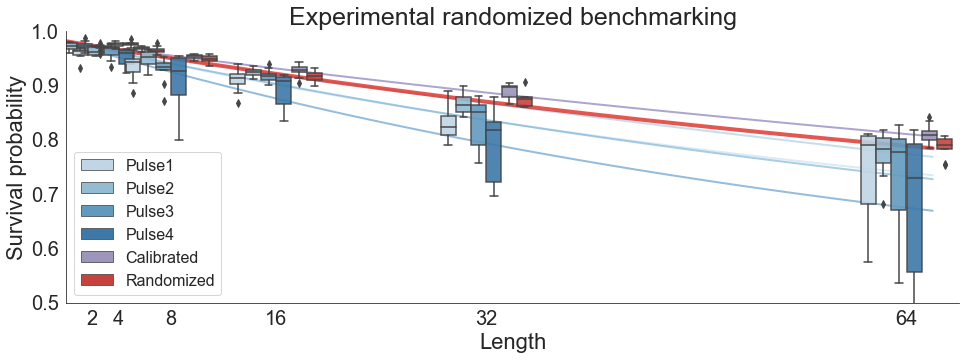

In [120]:
plt.figure(figsize=(16,5))

model = lambda n,a,b,p: a*p**n + b
for ind, title in enumerate(ordered_titles):
    color = my_pal[title]
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, 
                               p0=[.5,.9,.5],
                               bounds = (0,1))
    linewidth = 4 if title == 'Randomized' else 2
    alpha = .8 if title in ['Randomized', 'Calibrated'] else .5
    plt.plot(range(max(gate_lens)+3), model(range(max(gate_lens)+3), *popt), 
             color = color, linewidth=linewidth, alpha=alpha,
             zorder=0)          

sns.boxplot(x='length', y='survival', hue='experiment', 
            data = df,
            order = np.arange(65), width = 7, boxprops=dict(alpha=.9), palette=my_pal)
    
plt.xticks(gate_lens, gate_lens, fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,68)
plt.ylim(.5,1)
plt.xlabel('Length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
plt.legend(fontsize=16)
plt.title('Experimental randomized benchmarking', fontsize=25)
sns.despine()

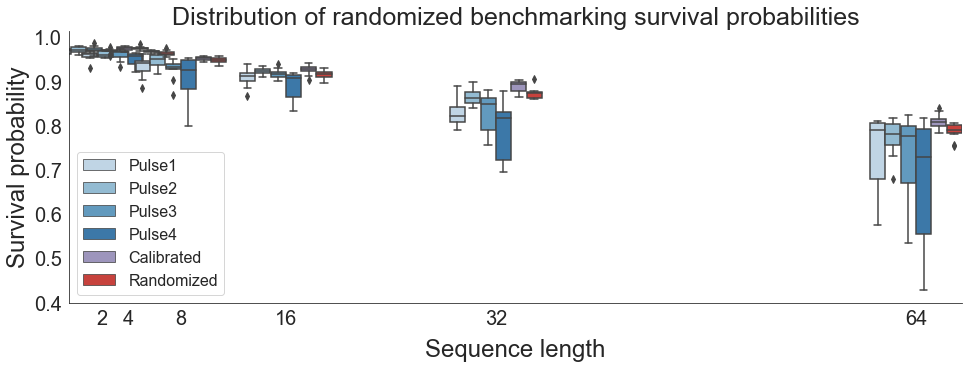

In [6]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111) 

sns.boxplot(x='length', y='survival', data=df, hue='experiment', width=7,
            order = np.arange(68), boxprops=dict(alpha=1), palette=my_pal, notch=False)

plt.xticks(gate_lens,gate_lens,fontsize=20)    
plt.yticks(fontsize=20)

# plt.ylim(.4,1)
plt.xlabel('')
plt.ylabel('Survival probability', fontsize=24)
plt.xlabel('Sequence length', fontsize=24, labelpad=10)
plt.title('Distribution of randomized benchmarking survival probabilities', fontsize=25)
sns.despine()
plt.legend(title='',fontsize=16)
plt.savefig('rb_data.pdf')

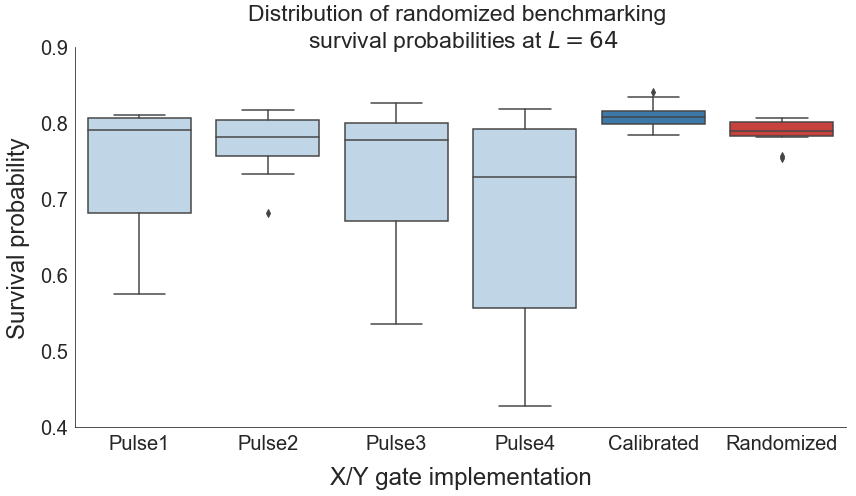

In [14]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111) 

colors = sns.color_palette("Blues")[1:5] + sns.color_palette("Set2")[0:2]
colors[1] = colors[0]
colors[2] = colors[0]
colors[3] = colors[0]
colors[-1] = '#de2d26'
colors[-2] = '#998ec3'
colors[-2] = sns.color_palette("Blues")[-2]
my_pal = {a:b for a,b in zip(ordered_titles, colors)}

sns.boxplot(x='experiment', y='survival', data=df.query("length == 64"),
            order = ordered_titles, boxprops=dict(alpha=1), palette=my_pal, notch=False)

plt.xticks(fontsize=20)    
plt.yticks(fontsize=20)

plt.ylim(.4,.9)
plt.xlabel('')
plt.ylabel('Survival probability', fontsize=24, labelpad=10)
plt.xlabel('X/Y gate implementation', fontsize=24, labelpad=13)
plt.title('Distribution of randomized benchmarking \
\n survival probabilities at $L=64$', fontsize=23, y=.98)
sns.despine()
plt.tight_layout()
plt.savefig('../../decorrelation/figures/rb_data.pdf')

In [10]:
df[df.length==64].groupby('experiment').mean()

,length,survival
experiment,,
Calibrated,64,0.8096
Pulse1,64,0.7402
Pulse2,64,0.7739
Pulse3,64,0.7338
Pulse4,64,0.6756
Randomized,64,0.7876


In [13]:
model = lambda n,a,b,p: a*p**n + b
for ind, title in enumerate(titles):
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, 
                               p0=[.5,.9,.5],
                               bounds = (0,1))
    print(title, "\t", popt[-1])

Calibrated 	 0.9937331926559301
Pulse1 	 0.9875276079741211
Pulse2 	 0.9944059997286445
Pulse3 	 0.9893969151284481
Pulse4 	 0.9860387828813776
Randomized 	 0.9902763851496289


(-1, 65)

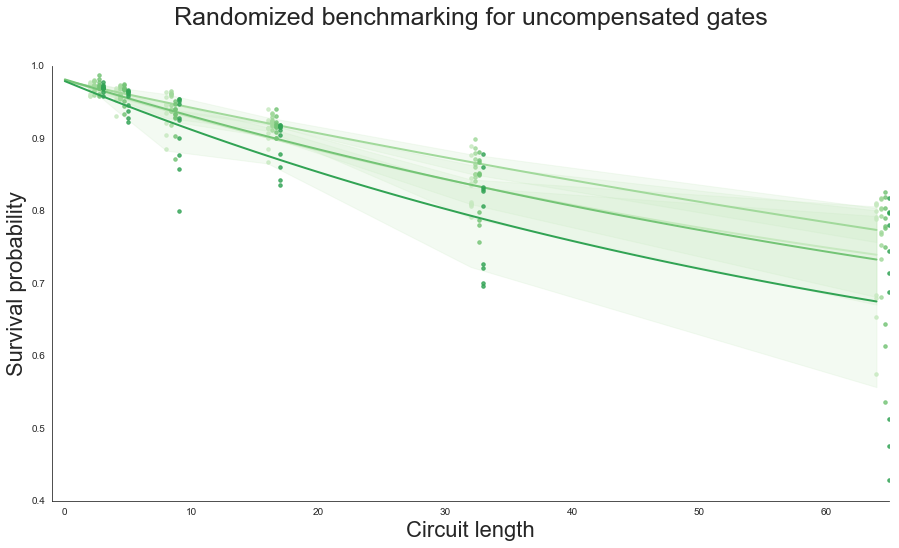

In [18]:
model = lambda n,a,b,p: a*p**n + b

colors = ['#c7e9c0','#a1d99b','#74c476','#31a354']

fig = plt.figure(figsize=(15,8))

for ind, title in enumerate( titles[1:5]):
    color = colors[ind]
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, 
                               p0=[.5,.9,.5],
                               bounds = (0,1))

    plt.plot(mydf['length'].values+ind/3,mydf['survival'].values,'.', 
             color=color,
             markersize=7,
             alpha=0.8,
             label = "Control shape {}".format(ind))    
    plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), 
             color = color, linewidth=2,
             label=r"     p = {:.3f}".format(popt[-1]))

    plt.fill_between(gate_lens, 
                     mydf.groupby('length').quantile(.25)['survival'].values,
                     mydf.groupby('length').quantile(.75)['survival'].values, alpha=.2, color=colors[0])
sns.despine()
plt.title("Randomized benchmarking for uncompensated gates", fontsize=25, y=1.08)
plt.xlabel('Circuit length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
plt.ylim(0.4,1)
plt.xlim(-1,max(gate_lens)+1)

In [240]:
asdf = mydf.groupby('length', as_index=False)

In [239]:
asdf.

(-1, 65)

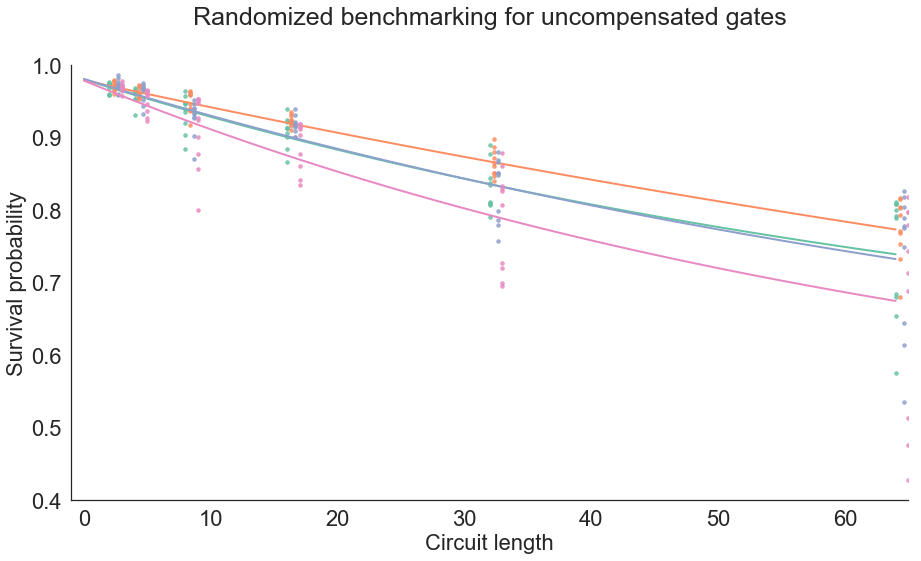

In [241]:
model = lambda n,a,b,p: a*p**n + b

colors = ['#c7e9c0','#a1d99b','#74c476','#31a354']
colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
fig = plt.figure(figsize=(15,8))

for ind, title in enumerate( titles[1:5]):
    color = colors[ind]
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, 
                               p0=[.5,.9,.5],
                               bounds = (0,1))

    plt.plot(mydf['length'].values+ind/3,mydf['survival'].values,
             '.', 
             color=color,
             markersize=7,
             alpha=0.8,
             label = "Control shape {}".format(ind))    
    
#     plt.boxplot(mydf['survival'].values, positions=gate_lens)
    
    plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), 
             color = color, linewidth=2,
             label=r"     p = {:.3f}".format(popt[-1]))

#     plt.fill_between(gate_lens, 
#                      mydf.groupby('length').quantile(.25)['survival'].values,
#                      mydf.groupby('length').quantile(.75)['survival'].values, alpha=0.35, color=color)
sns.despine()
plt.title("Randomized benchmarking for uncompensated gates", fontsize=25, y=1.08)
plt.xlabel('Circuit length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
plt.ylim(0.4,1)
plt.xlim(-1,max(gate_lens)+1)

Text(0.5,0,'Circuit length')

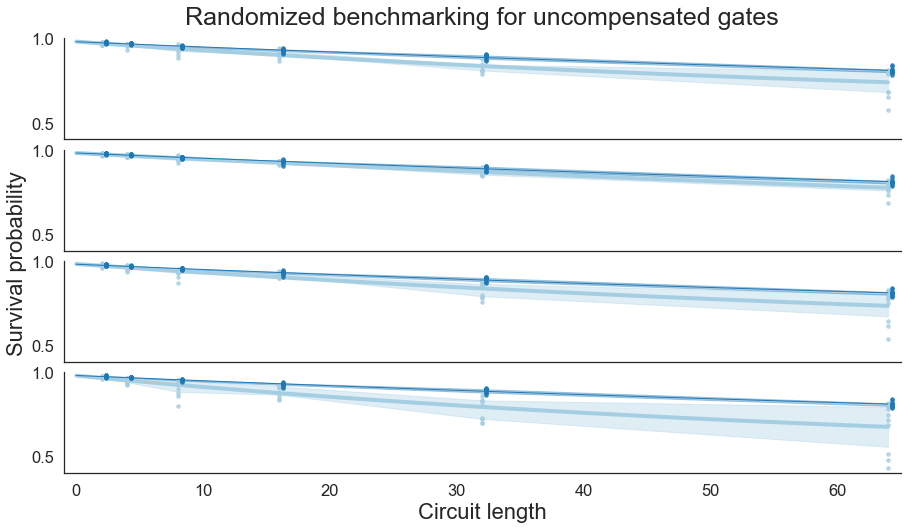

In [200]:
model = lambda n,a,b,p: a*p**n + b

colors = ['#a6cee3','#1f78b4',]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111) 

# sns.set(font_scale=1.5)
# sns.set_style('white')

for pulseind in range(1,5):
    ax = plt.subplot(4,1,pulseind)
    for ind, title in enumerate([ titles[pulseind],titles[0]]):
        mydf = df.query("experiment == '{}'".format(title))
        means = mydf.groupby('length',as_index=False).mean()
        popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, 
                                   p0=[.5,.9,.5],
                                   bounds = (0,1))

        plt.plot(mydf['length'].values+ind/3,mydf['survival'].values,'.', 
                 color=colors[ind],
                 markersize=7,
                 alpha=0.8,
                 label = "Control shape {}".format(ind))    
        plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), 
                 color = colors[ind], linewidth=4 if ind==0 else 1,
                 label=r"     p = {:.3f}".format(popt[-1]))

        plt.fill_between(gate_lens, 
                         mydf.groupby('length').quantile(.25)['survival'].values,
                         mydf.groupby('length').quantile(.75)['survival'].values, alpha=0.35, color=colors[ind])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if pulseind == 1:
        plt.title("Randomized benchmarking for uncompensated gates", fontsize=25, y=1.08)
    if pulseind != 4:
        plt.xticks([])
    if pulseind == 3:
        plt.ylabel('                Survival probability', fontsize=22)
    plt.yticks([0.5,1.0])
    plt.ylim(0.4,1)
    plt.xlim(-1,max(gate_lens)+1)

plt.subplots_adjust(hspace=0.1)

# plt.legend(loc='lower left',numpoints=4, fontsize=17)
# ax.set_ylabel('Survival probability', fontsize=22);
plt.xlabel('Circuit length', fontsize=22)

# sns.despine(bottom=True)

In [180]:
ax.axes.spines[]

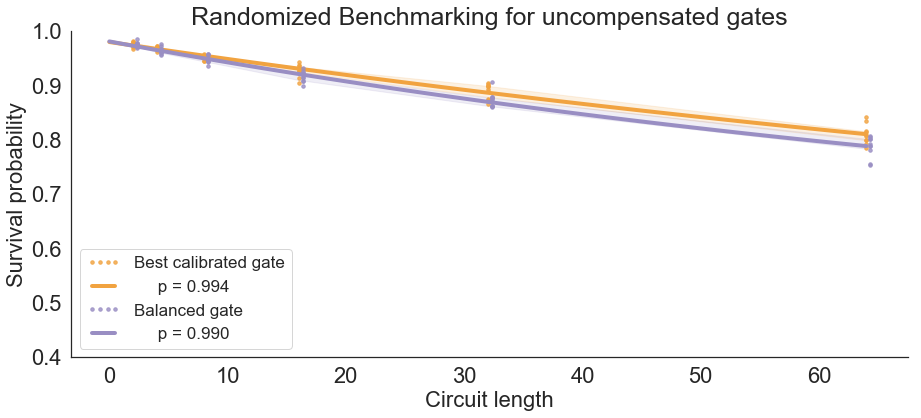

In [202]:
colors = ['#f1a340','#998ec3']
model = lambda n,a,b,p: a*p**n + b
plt.figure(figsize=(15,6))
sns.set(font_scale=2)
sns.set_style('white')
labels = ['Best calibrated gate', 'Balanced gate']
for ind, title in enumerate([titles[0],titles[-1]]):
#     plt.subplot(411+ind)
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, p0=[.5,.9,.5], bounds = (0,1))

    plt.plot(mydf['length'].values+ind/3,mydf['survival'].values,'.', color=colors[ind],markersize=7,alpha=0.8,
            label = labels[ind])    
    plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), color = colors[ind], linewidth=4,
            label=r"     p = {:.3f}".format(popt[-1]))

    plt.fill_between(gate_lens, 
                     mydf.groupby('length').quantile(.25)['survival'].values,
                     mydf.groupby('length').quantile(.75)['survival'].values, alpha=0.15, color=colors[ind])

plt.title("Randomized Benchmarking for uncompensated gates", fontsize=25)
plt.ylim(0.4,1)
plt.legend(loc='lower left',numpoints=4, fontsize=17)
plt.xlabel('Circuit length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
sns.despine()

0


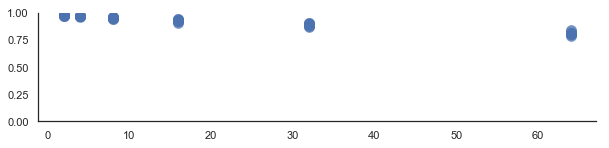

1


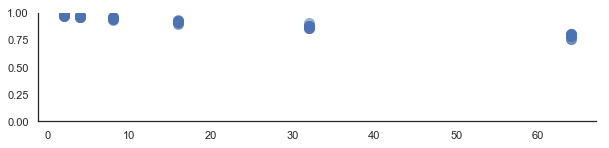

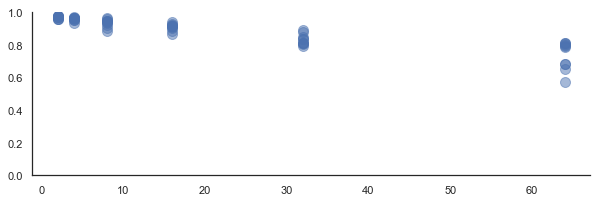

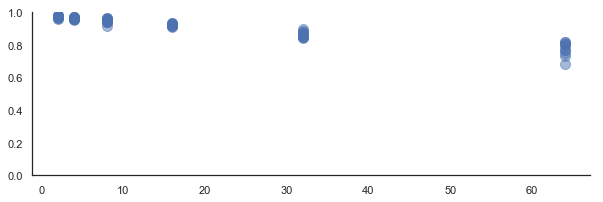

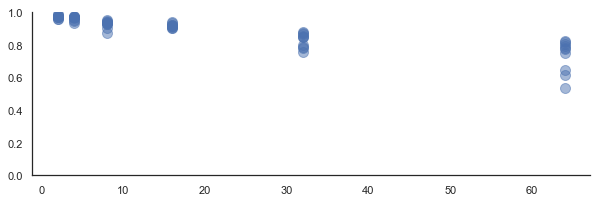

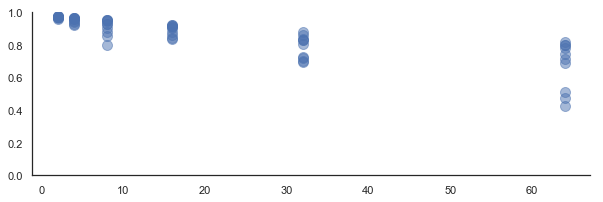

In [62]:

for i, pulse_data in enumerate([rb_data[0], rb_data[-1]]):
    plt.figure(figsize=(10,2))
    print(i)
    data = np.array([(x,y) for x,ys in zip(gate_lens, pulse_data) for y in ys ]).T
    plt.plot(data[0],1-data[1],'.',alpha = 0.5, markersize=20)
    sns.despine()
    plt.ylim(0,1)
    plt.show()

for i, pulse_data in enumerate(rb_data[1:5]):
    plt.figure(figsize=(10,3))
    data = np.array([(x,y) for x,ys in zip(gate_lens, pulse_data) for y in ys ]).T
    plt.plot(data[0],1-data[1],'.',alpha = 0.5, markersize=20)
    sns.despine()
    plt.ylim(0,1)
    plt.show()


    
# min_y,_ = plt.ylim()
# plt.ylim(min_y,1)
# plt.show()

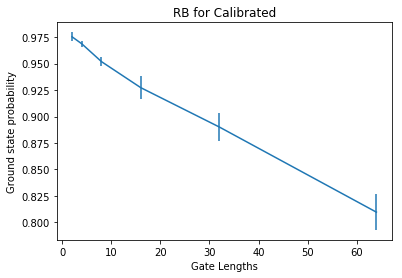

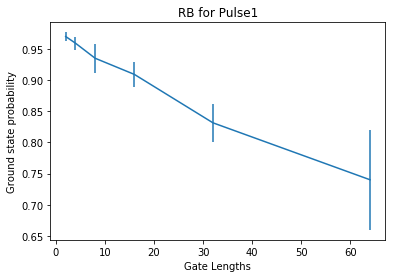

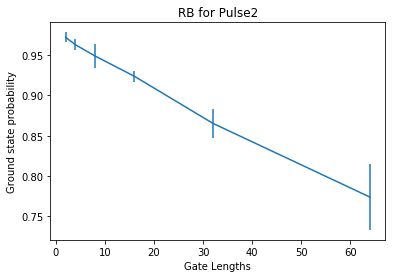

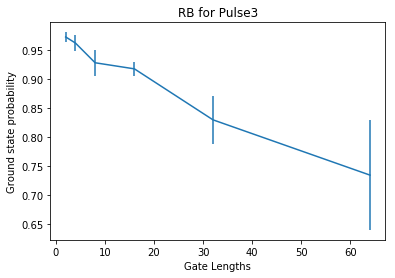

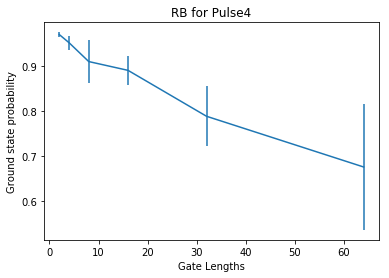

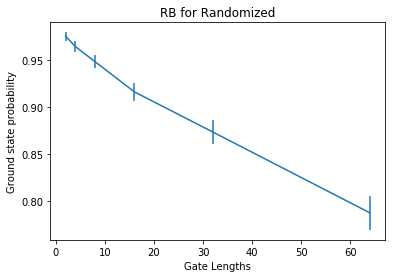

In [11]:
titles = ['Calibrated', 'Pulse1', 'Pulse2', 'Pulse3', 'Pulse4', 'Randomized']
for i, pulse_data in enumerate(rb_data):
    plt.errorbar(gate_lens, 1-np.average(pulse_data, axis=1), np.std(pulse_data, axis=1))
    plt.ylabel("Ground state probability")
    plt.xlabel('Gate Lengths')
    plt.title("RB for {}".format(titles[i]))
    plt.show()